# STATIC MAP BY MATPLOTLIB

In [6]:
%matplotlib inline

In [1]:
import json
import random

In [210]:
NSTATIONS=50
tmp_geojson = {'type':'FeatureCollection', 'features':[]}
for i in range(NSTATIONS):
    rlon=random.uniform(9, 19)
    rlat=random.uniform(36, 48)
    data_PGV=random.uniform(0, 1.2)
    data_PGD=random.uniform(0, 1)
    data_PGA=random.uniform(0, 17)
    data_PSA_0=random.uniform(0, 17)
    data_PSA_1 =random.uniform(0, 17)
    data_PSA_3 =random.uniform(0, 17)
    synt_PGV=random.uniform(0, 1.2)
    synt_PGD=random.uniform(0, 1)
    synt_PGA=random.uniform(0, 17)
    synt_PSA_0=random.uniform(0, 17)
    synt_PSA_1 =random.uniform(0, 17)
    synt_PSA_3 =random.uniform(0, 17)
    difference_PGV   =data_PGV  -synt_PGV  
    difference_PGD   =data_PGD  -synt_PGD  
    difference_PGA   =data_PGA  -synt_PGA  
    difference_PSA_0 =data_PSA_0-synt_PSA_0
    difference_PSA_1 =data_PSA_1-synt_PSA_1
    difference_PSA_3 =data_PSA_3-synt_PSA_3
    relative_PGV   =difference_PGV  /data_PGV  
    relative_PGD   =difference_PGD  /data_PGD  
    relative_PGA   =difference_PGA  /data_PGA  
    relative_PSA_0 =difference_PSA_0/data_PSA_0
    relative_PSA_1 =difference_PSA_1/data_PSA_1
    relative_PSA_3 =difference_PSA_3/data_PSA_3

    feature = {'type':'Feature',
                   'properties':{'station':'',
                                 'data':{},
                                 'synt':{},
                                 'difference':{},
                                 'relative_difference':{},
                                },
                   'geometry':{'type':'Point',
                               'coordinates':[]}}
    feature['geometry']['coordinates'] = [rlon,rlat]
    feature['properties']['data'] = {
                    "PGV":       data_PGV  ,
                    "PGD":       data_PGD  ,
                    "PGA":       data_PGA  ,
                    "PSA_0.3Hz":  data_PSA_0,
                    "PSA_1Hz":   data_PSA_1,
                    "PSA_3Hz":   data_PSA_3
                }
    feature['properties']['synt'] = {
                "PGV":       synt_PGV  ,
                "PGD":       synt_PGD  ,
                "PGA":       synt_PGA  ,
                "PSA_0.3Hz": synt_PSA_0,
                "PSA_1Hz":   synt_PSA_1,
                "PSA_3Hz":   synt_PSA_3
            }
    feature['properties']['difference'] = {
                "PGV":       difference_PGV  ,
                "PGD":       difference_PGD  ,
                "PGA":       difference_PGA  ,
                "PSA_0.3Hz": difference_PSA_0,
                "PSA_1Hz":   difference_PSA_1,
                "PSA_3Hz":   difference_PSA_3
            }
    feature['properties']['relative_difference'] = {
                "PGV":       relative_PGV  ,
                "PGD":       relative_PGD  ,
                "PGA":       relative_PGA  ,
                "PSA_0.3Hz": relative_PSA_0,
                "PSA_1Hz":   relative_PSA_1,
                "PSA_3Hz":   relative_PSA_3
            }    
    
    feature['properties']['station']='ST'+str(i).zfill(3)
    tmp_geojson['features'].append(feature)




In [211]:
with open("data_file.json", "w") as write_file:
    json.dump(tmp_geojson, write_file)

In [212]:
with open("data_file.json", "r") as read_file:
    data = json.load(read_file)

In [213]:
data["features"][0]['properties']['data']

{u'PGA': 12.263841720231168,
 u'PGD': 0.6328199854800932,
 u'PGV': 0.9742801388580584,
 u'PSA_0.3Hz': 6.681674655288807,
 u'PSA_1Hz': 8.583994793998372,
 u'PSA_3Hz': 2.422356384667335}

In [214]:
import matplotlib.pyplot as plt 
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [215]:
def plot_single(ax,variable='PGV',kind='data',source=None,bounds=None,
                xtitle=None,ytitle=None,vmin=None,vmax=None):
    lon= [x['geometry']['coordinates'][0]for x in source["features"]]
    lat= [x['geometry']['coordinates'][1]for x in source["features"]]
    values=[x['properties'][kind][variable] for x in data["features"]]
    a=plt.axes(ax)
    if not bounds:
        dlat=(max(lat)-min(lat))*.3
        dlon=(max(lon)-min(lon))*.3
        minlat=min(lat)-dlat
        maxlat=max(lat)+dlat
        minlon=min(lon)-dlon
        maxlon=max(lon)+dlon
    else:
        minlat=bound[2]
        maxlat=bound[3]
        minlon=bound[0]
        maxlon=bound[1]
    if vmin is None:
        vmin=min(values)
    if vmax is None:
        vmax=min(values)
        
        
        
    m = Basemap(projection='merc', resolution='c',
            llcrnrlat=minlat, urcrnrlat=maxlat,
            llcrnrlon=minlon, urcrnrlon=maxlon)
    x,y=m(lon,lat)
    if kind == 'difference' or kind == 'relative_difference':
        cmap='seismic'
    else:
        cmap='hot'
    scat=m.scatter(x,y, alpha=.5, edgecolors='k',cmap=cmap,c=values,vmin=vmin,vmax=vmax)
    #m.shadedrelief()
    m.drawcoastlines()
    if xtitle:
        plt.title(xtitle)
    if ytitle:
        plt.ylabel(ytitle)
    divider = make_axes_locatable(a)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    f.colorbar(scat, cax=cax, orientation='vertical')
    
    

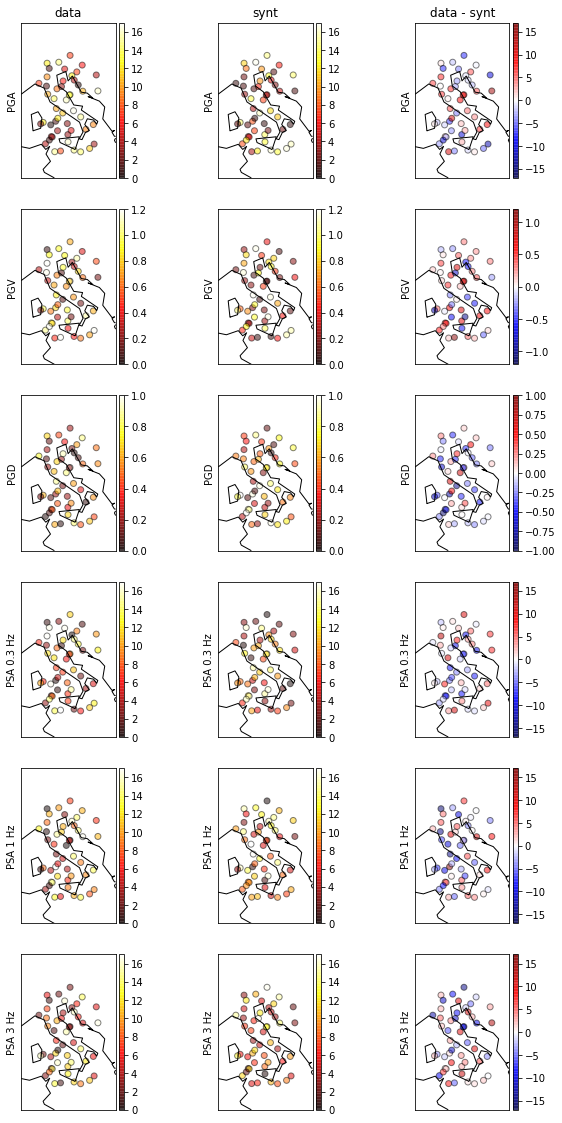

In [216]:
f, axes = plt.subplots(6, 3, sharex='col', sharey='row')
f.set_size_inches([10,20])

k='data'
i=0
ax=axes[:,i]
plot_single(ax[0] ,'PGA',k,source=data,xtitle=k,ytitle='PGA',vmin=0,vmax=17)
plot_single(ax[1] ,'PGV',k,source=data,xtitle=None,  ytitle='PGV',vmin=0,vmax=1.2)
plot_single(ax[2] ,'PGD',k,source=data,xtitle=None,  ytitle='PGD',vmin=0,vmax=1)
plot_single(ax[3] ,'PSA_0.3Hz',k,source=data,xtitle=None,  ytitle='PSA 0.3 Hz',vmin=0,vmax=17)
plot_single(ax[4] ,'PSA_1Hz'  ,k,source=data,xtitle=None,  ytitle='PSA 1 Hz',vmin=0,vmax=17)
plot_single(ax[5] ,'PSA_3Hz'  ,k,source=data,xtitle=None,  ytitle='PSA 3 Hz',vmin=0,vmax=17)

k='synt'
i=1
ax=axes[:,i]
plot_single(ax[0] ,'PGA',k,source=data,xtitle=k,ytitle='PGA',vmin=0,vmax=17)
plot_single(ax[1] ,'PGV',k,source=data,xtitle=None,  ytitle='PGV',vmin=0,vmax=1.2)
plot_single(ax[2] ,'PGD',k,source=data,xtitle=None,  ytitle='PGD',vmin=0,vmax=1)
plot_single(ax[3] ,'PSA_0.3Hz',k,source=data,xtitle=None,  ytitle='PSA 0.3 Hz',vmin=0,vmax=17)
plot_single(ax[4] ,'PSA_1Hz'  ,k,source=data,xtitle=None,  ytitle='PSA 1 Hz',vmin=0,vmax=17)
plot_single(ax[5] ,'PSA_3Hz'  ,k,source=data,xtitle=None,  ytitle='PSA 3 Hz',vmin=0,vmax=17)

k='difference'
i=2
ax=axes[:,i]
plot_single(ax[0] ,'PGA',k,source=data,xtitle='data - synt',ytitle='PGA',vmin=-17,vmax=17)
plot_single(ax[1] ,'PGV',k,source=data,xtitle=None,  ytitle='PGV',vmin=-1.2,vmax=1.2)
plot_single(ax[2] ,'PGD',k,source=data,xtitle=None,  ytitle='PGD',vmin=-1,vmax=1)
plot_single(ax[3] ,'PSA_0.3Hz',k,source=data,xtitle=None,  ytitle='PSA 0.3 Hz',vmin=-17,vmax=17)
plot_single(ax[4] ,'PSA_1Hz'  ,k,source=data,xtitle=None,  ytitle='PSA 1 Hz',vmin=-17,vmax=17)
plot_single(ax[5] ,'PSA_3Hz'  ,k,source=data,xtitle=None,  ytitle='PSA 3 Hz',vmin=-17,vmax=17)



# INTERACTIVE MAP USING BOKEH

In [1]:
from bokeh.io import output_file, show, output_notebook
from bokeh.models import GeoJSONDataSource
from bokeh.plotting import figure
from bokeh.tile_providers import CARTODBPOSITRON
from bokeh.io import output_file, output_notebook, show
from bokeh.models import ColumnDataSource
from bokeh.transform import linear_cmap

In [2]:
with open("/Users/casarotti/Downloads/data_file.json", "r") as read_file:
    datasource = json.load(read_file)

In [36]:
from bokeh.plotting import figure, show, output_file
from bokeh.tile_providers import STAMEN_TERRAIN_RETINA,STAMEN_TONER
from bokeh.layouts import gridplot
# range bounds supplied in web mercator coordinates
#p = figure(x_range=(-2000000, 6000000), y_range=(-1000000, 7000000),
#           x_axis_type="mercator", y_axis_type="mercator")

from bokeh.models import ColorBar
from bokeh.transform import linear_cmap
from pyproj import Proj, transform 
lon= [x['geometry']['coordinates'][0]for x in datasource["features"]]
lat= [x['geometry']['coordinates'][1]for x in datasource["features"]]
easting, northing = transform(Proj(init='epsg:4326'), Proj(init='epsg:3857'), lon, lat)

fh=200
fw=200

output_notebook()
variable='PGV';vmax=1.2
#variable='PGD';vmax=1
#variable='PGA';vmax=17
#variable='PSA_0.3Hz';vmax=17
#variable='PSA_1Hz'  ;vmax=17
#variable='PSA_3Hz'  ;vmax=17

values=[]
kind='data'
values.append([x['properties'][kind][variable] for x in datasource["features"]])
kind='synt'
values.append([x['properties'][kind][variable] for x in datasource["features"]])
kind='difference'
values.append([x['properties'][kind][variable] for x in datasource["features"]])
source = ColumnDataSource(
    data=dict(
        lat=northing,
        lon=easting,
        glat=lat,
        glon=lon,
        data_variable      =values[0],
        synt_variable      =values[1],
        difference_variable=values[2]
    )
)


TOOLTIPS = [
    ("lon,lat", "(@glon, @glat)"),
    ("v",str(variable)),
    ('DATA', "@data_variable"),
    ('SYNT', "@synt_variable"),
    ('DATA-SYNT', "@difference_variable"),
]


d_mapper = linear_cmap(field_name='data_variable', palette="Inferno256" ,low=0 ,high=vmax)
color_bar = ColorBar(color_mapper=d_mapper['transform'], width=10,  location=(0,0))

d = figure(title='DATA',height=fh,width=fw, match_aspect=True,
           y_range=(min(northing), max(northing)),
           x_range=( min(easting), max(easting)), tooltips=TOOLTIPS
          )
d.add_tile(STAMEN_TONER)
d.circle(x="lon", y="lat", size=10, fill_alpha=1, source=source,color=d_mapper)
d.axis.visible = False

s_mapper = linear_cmap(field_name='data_variable', palette="Inferno256" ,low=0 ,high=vmax)
color_bar = ColorBar(color_mapper=s_mapper['transform'], width=10,  location=(0,0))

s = figure(title='SYNT',height=fh,width=fw,
           y_range=d.y_range,
           x_range=d.x_range, tooltips=TOOLTIPS
          )
s.add_tile(CARTODBPOSITRON)
s.circle(x="lon", y="lat", size=10, fill_alpha=1, source=source,color=s_mapper)
s.axis.visible = False


cb1 = figure(height=fh, 
             width=120, 
             toolbar_location=None, 
             min_border=0, 
             outline_line_color=None,
             title=variable,
             title_location='right')
color_bar = ColorBar(color_mapper=d_mapper['transform'], width=10,  location=(0,0))
cb1.add_layout(color_bar, 'right')
cb1.title.align = 'center'
cb1.title.text_font_size = '10pt'


difference_mapper = linear_cmap(field_name='difference_variable', palette="Viridis256" ,low=-vmax ,high=vmax)
difference_color_bar = ColorBar(color_mapper=difference_mapper['transform'], width=10,  location=(0,0))

diff = figure(title='VARIATION',height=fh,width=fw,
           y_range=d.y_range,
           x_range=d.x_range, tooltips=TOOLTIPS
          )
diff.add_tile(STAMEN_TONER)
diff.circle(x="lon", y="lat", size=10, 
            fill_alpha=1, source=source,color=difference_mapper)
diff.axis.visible = False



cb2 = figure(height=fh, 
               width=100, 
               toolbar_location=None, 
               min_border=0, 
               outline_line_color=None,
               title='PGV Data-Synt',
               title_location='right')
cb2.add_layout(difference_color_bar, 'right')
cb2.title.align = 'center'
cb2.title.text_font_size = '10pt'






#show(d)
#show(gridplot([[d,cb1]],toolbar_location="below"))
show(gridplot([[d,s,cb1,diff,cb2]],toolbar_location="below"))

Loading BokehJS ...

<img src="interactive map.png" />

In [ ]:
<img src="image_file_in_this_directory.svg" />